In [1]:
#importing necessary packages

#general data analysis packages
import pandas as pd
import numpy as np

#visualization / plotting packages
import matplotlib.pyplot as plt
import seaborn as sns

#these packages pertain to time series
from neuralprophet import NeuralProphet
import datetime
from sklearn.model_selection import TimeSeriesSplit

#ignore code warnings
import warnings
warnings.filterwarnings('ignore')

C:\Users\kmbro\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#importing csv using file path
df = pd.read_csv(r"C:\Users\kmbro\OneDrive\Documents\MSDA_Courses\D214\PreciousMetals.csv")

In [3]:
#EDA - column names
df.columns

Index(['ticker', 'commodity', 'date', 'open', 'high', 'low', 'close',
       'volume'],
      dtype='object')

In [4]:
#EDA - number of rows, columns
df.shape

(27994, 8)

In [5]:
#EDA - assessing data types of columns
df.dtypes

ticker        object
commodity     object
date          object
open         float64
high         float64
low          float64
close        float64
volume         int64
dtype: object

In [6]:
#EDA - assessing unique values in commodity column
df.commodity.unique()

array(['Gold', 'Silver', 'Platinum', 'Copper', 'Palladium'], dtype=object)

Text(0, 0.5, 'Counts')

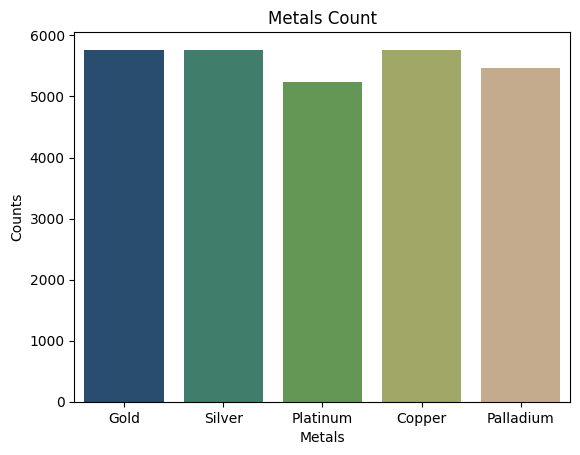

In [7]:
#EDA - Graphing counts 
sns.countplot(data=df, x='commodity',palette = 'gist_earth')
plt.title('Metals Count')
plt.xlabel('Metals')
plt.ylabel('Counts')

Text(0.5, 1.0, 'Commodity V. Closing Market Value')

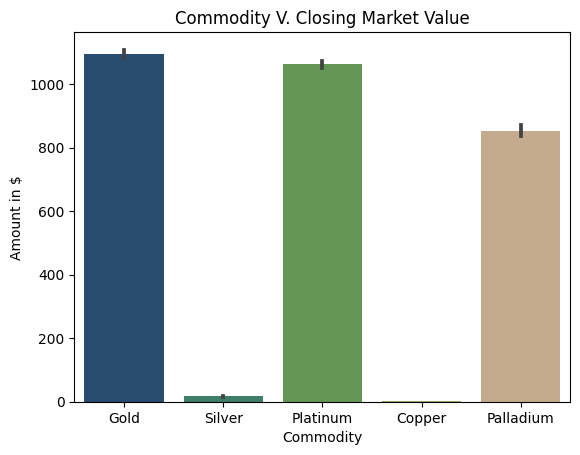

In [8]:
#EDA - Graphing costs x metal
sns.barplot(data=df, x='commodity', y='close', palette = 'gist_earth')
plt.xlabel("Commodity")
plt.ylabel("Amount in $")
plt.title("Commodity V. Closing Market Value")

In [9]:
#data cleaning - assessing need for data prep 
df.isnull().sum()

ticker       0
commodity    0
date         0
open         0
high         0
low          0
close        0
volume       0
dtype: int64

In [10]:
#data cleaning - assessing for duplicate values
df.duplicated()


0        False
1        False
2        False
3        False
4        False
         ...  
27989    False
27990    False
27991    False
27992    False
27993    False
Length: 27994, dtype: bool

In [11]:
#convert "date" entry to datetime 
df['date'] = pd.to_datetime(df['date'])

In [12]:
#ensuring datetime function was successful
df.date

0       2000-08-30
1       2000-08-31
2       2000-09-01
3       2000-09-05
4       2000-09-06
           ...    
27989   2023-08-14
27990   2023-08-15
27991   2023-08-16
27992   2023-08-17
27993   2023-08-18
Name: date, Length: 27994, dtype: datetime64[ns]

In [13]:
#creating smaller datasets for unique values 'gold','silver','platinum', and 'palladium' from 'commodity' column
golddf = df[df['commodity'] == 'Gold']
silverdf = df[df['commodity'] == 'Silver']
platdf  = df[df['commodity'] == 'Platinum']
palldf = df[df['commodity'] == 'Palladium']


In [14]:
#selecting only necessary columns for new datasets
golddf = golddf[['date','close']]
silverdf = silverdf[['date','close']]
platdf = platdf[['date','close']]
palldf = palldf[['date','close']]


In [15]:
#EDA - number of rows, columns
golddf.shape

(5762, 2)

In [16]:
#EDA - number of rows, columns
silverdf.shape

(5764, 2)

In [17]:
#EDA - number of rows, columns
platdf.shape

(5231, 2)

In [18]:
#EDA - number of rows, columns
palldf.shape

(5471, 2)

Text(0.5, 1.0, 'Gold Closing Market Value over Years')

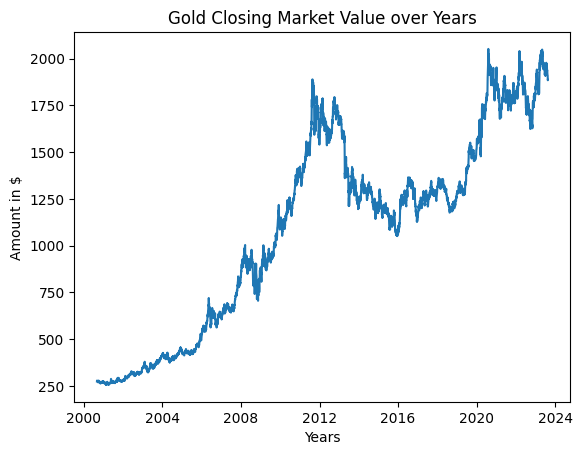

In [19]:
#EDA - time plot 
plt.plot(golddf['date'], golddf['close'])

plt.xlabel("Years")
plt.ylabel("Amount in $")
plt.title("Gold Closing Market Value over Years")

Text(0.5, 1.0, 'Silver Closing Market Value over Years')

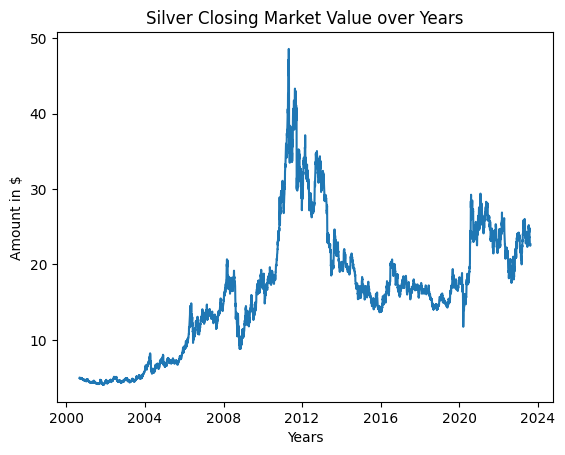

In [20]:
#EDA - time plot 
plt.plot(silverdf['date'], silverdf['close'])
plt.xlabel("Years")
plt.ylabel("Amount in $")
plt.title("Silver Closing Market Value over Years")

Text(0.5, 1.0, 'Platinum Closing Market Value over Years')

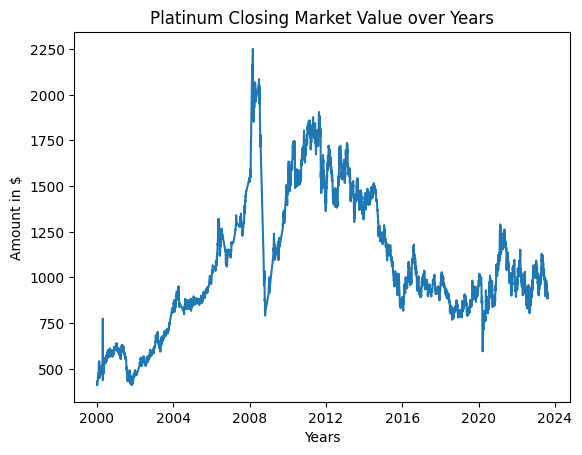

In [21]:
#EDA - time plot 
plt.plot(platdf['date'], platdf['close'])
plt.xlabel("Years")
plt.ylabel("Amount in $")
plt.title("Platinum Closing Market Value over Years")

Text(0.5, 1.0, 'Palladium Closing Market Value over Years')

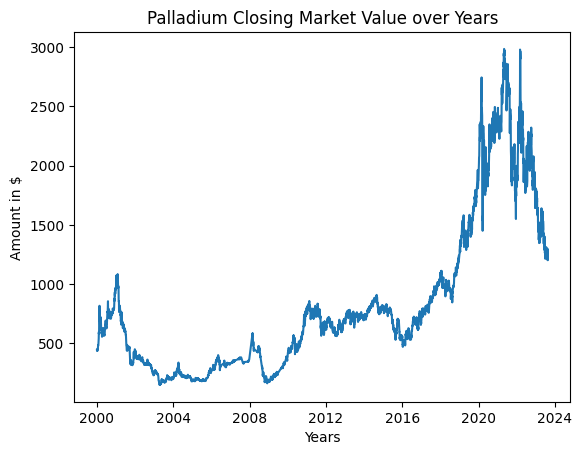

In [22]:
#EDA - time plot 
plt.plot(palldf['date'], palldf['close'])
plt.xlabel("Years")
plt.ylabel("Amount in $")
plt.title("Palladium Closing Market Value over Years")

# Gold Model & Validation

In [23]:
#NeuralProphet expects two columns: 'ds' for dates and 'y' for observed value
golddf.rename(columns = {'date':'ds', 'close' : 'y'}, inplace=True)

In [24]:
#gold model and visualizations 

#fitting model to a split dataset (90/10 : train/test)
m = NeuralProphet()
golddf_train, golddf_val = m.split_df(golddf, freq='M', valid_p = 0.1)
goldmetrics = m.fit(golddf_train, freq='M', validation_df=golddf_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.217% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.201% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - 

Finding best initial lr:   0%|          | 0/243 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [25]:
#evaluation metrics
goldmetrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,3942.838623,4215.206543,2.141020,0.0,0,2146.890381,2591.145508,0.836226,0.0
1,3484.760254,3732.185303,1.836710,0.0,1,1915.014404,2319.396729,0.715437,0.0
2,2841.334961,3045.585693,1.410217,0.0,2,1601.750122,1943.891113,0.548300,0.0
3,2030.000244,2162.131348,0.873831,0.0,3,1224.168457,1474.801514,0.349815,0.0
4,1302.630737,1343.519653,0.399309,0.0,4,882.411133,1045.079346,0.174840,0.0
...,...,...,...,...,...,...,...,...,...
117,74.993805,101.353729,0.002297,0.0,117,58.592773,83.068092,0.001432,0.0
118,74.936249,100.233246,0.002247,0.0,118,58.725849,83.016502,0.001427,0.0
119,74.864487,101.137688,0.002288,0.0,119,58.264858,82.617729,0.001420,0.0
120,74.885567,101.151268,0.002288,0.0,120,58.631397,83.071648,0.001430,0.0


In [26]:
#creating predictions
goldfuture = m.make_future_dataframe(golddf, periods=12)
goldforecast = m.predict(goldfuture)

#view the first 5 entries of forecasted prices
goldforecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.217% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


Predicting: 163it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-08-31,None,2018.292847,2224.430420,22.454258,-228.591751
1,2023-09-30,None,2991.496338,2233.907471,8.907005,748.681702
2,2023-10-31,None,2017.463501,2243.700684,2.582064,-228.819199
3,2023-11-30,None,2010.105225,2253.177734,-14.480795,-228.591751
4,2023-12-31,None,2640.358643,2262.970947,-14.323772,391.711548


In [27]:
#view the last 5 entries of forecasted prices
goldforecast.tail(5)

,ds,y,yhat1,trend,season_yearly,season_weekly
7,2024-03-31,None,2682.298828,2291.717773,-1.130560,391.711548
8,2024-04-30,None,2072.874756,2301.194824,0.499104,-228.819199
9,2024-05-31,None,2070.079346,2310.988037,-11.878261,-229.030319
10,2024-06-30,None,2700.212891,2320.465088,-11.963698,391.711548
11,2024-07-31,None,2103.938477,2330.258057,0.432387,-226.751770


In [28]:
#visualization of prediction 
m.plot(goldforecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '057e6642-85bc-48b0-a885-533999cef72c',
              'x': array([datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 9, 30, 0, 0),
                          datetime.datetime(2023, 10, 31, 0, 0),
                          datetime.datetime(2023, 11, 30, 0, 0),
                          datetime.datetime(2023, 12, 31, 0, 0),
                          datetime.datetime(2024, 1, 31, 0, 0),
                          datetime.datetime(2024, 2, 29, 0, 0),
                          datetime.datetime(2024, 3, 31, 0, 0),
                          datetime.datetime(2024, 4, 30, 0, 0),
                          datetime.datetime(2024, 5, 31, 0, 0),
                          datetime.datetime(2024, 6, 30, 0, 0),
           

In [29]:
#visualizing components
m.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': 'e1875e27-b64a-4210-8288-75fd6a2a4a67',
              'x': array([datetime.datetime(2000, 8, 31, 0, 0),
                          datetime.datetime(2000, 9, 30, 0, 0),
                          datetime.datetime(2000, 10, 31, 0, 0), ...,
                          datetime.datetime(2021, 2, 28, 0, 0),
                          datetime.datetime(2021, 3, 31, 0, 0),
                          datetime.datetime(2021, 4, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 485.13842018,  486.95670027,  488.83558969, ..., 1935.69569571,
                          1945.48867415, 1954.96575006]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'name': 'Trend Rate Change',
              'type': 'bar',
    

Text(0.5, 1.0, 'Gold Validation Model Loss (MAE)')

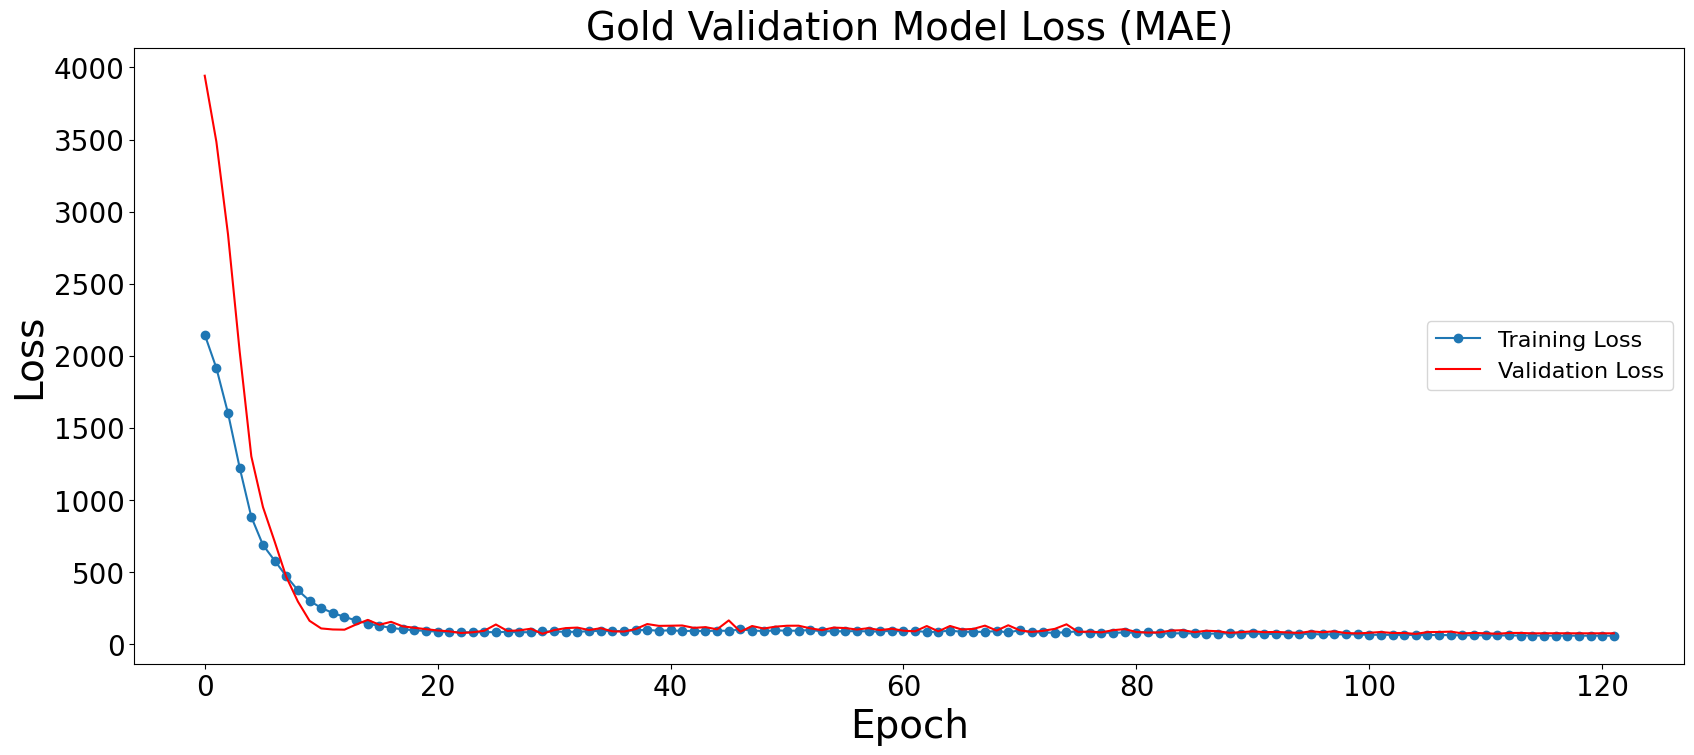

In [30]:
#visualizing MAE, evaluation metric 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(goldmetrics["MAE"], '-o', label="Training Loss")  
ax.plot(goldmetrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Gold Validation Model Loss (MAE)", fontsize=28)

In [31]:
#calculating MAPE for model accuracy
goldmean = golddf_val['y'].mean()


In [32]:
goldresult = 75.167763/goldmean *100
print("The MAPE of the gold model is: ", goldresult)

if goldresult >=26:
    print("Null Hypothesis: The accuracy of this model does not meet 75% accuracy")
else:
    print("Alternate Hypothesis: The accuracy of this model does meet 75% accuracy")

The MAPE of the gold model is:  4.088707833058266
Alternate Hypothesis: The accuracy of this model does meet 75% accuracy


# Silver Model & Validation

In [33]:
#NeuralProphet expects two columns: 'ds' for dates and 'y' for observed value
silverdf.rename(columns = {'date':'ds', 'close' : 'y'}, inplace=True)

In [34]:
#silver model and visualizations 

#fitting model to a split dataset (90/10 : train/test)
m = NeuralProphet()
silverdf_train, silverdf_val = m.split_df(silverdf, freq='M', valid_p = 0.1)
silvermetrics = m.fit(silverdf_train, freq='M', validation_df=silverdf_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.253% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.241% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - 

Finding best initial lr:   0%|          | 0/243 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [35]:
#evaluation metrics
silvermetrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,25.546572,30.034426,0.490118,0.0,0,28.227438,32.861668,0.416600,0.0
1,21.052364,25.056021,0.358041,0.0,1,25.293015,29.640032,0.347256,0.0
2,15.169636,18.359154,0.202129,0.0,2,21.352465,25.304451,0.258098,0.0
3,8.811641,10.798043,0.071299,0.0,3,16.436686,19.694069,0.157903,0.0
4,4.989981,6.234167,0.023767,0.0,4,11.781739,14.327959,0.080869,0.0
...,...,...,...,...,...,...,...,...,...
117,2.266663,2.876771,0.005061,0.0,117,1.716167,2.413302,0.003083,0.0
118,2.272905,2.882310,0.005080,0.0,118,1.705250,2.412404,0.003075,0.0
119,2.273770,2.882603,0.005081,0.0,119,1.708992,2.412863,0.003072,0.0
120,2.268713,2.878916,0.005068,0.0,120,1.718436,2.425371,0.003134,0.0


In [36]:
#creating predictions
silverfuture = m.make_future_dataframe(silverdf, periods=12)
silverforecast = m.predict(silverfuture)

#view the first 5 entries of forecasted prices
silverforecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 96.253% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


Predicting: 163it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-08-31,None,24.171295,33.149433,0.638765,-9.616902
1,2023-09-30,None,57.832272,33.241676,0.029885,24.560709
2,2023-10-31,None,23.592159,33.337002,-0.119686,-9.625155
3,2023-11-30,None,23.578846,33.429245,-0.233495,-9.616902
4,2023-12-31,None,56.810101,33.524563,-0.328537,23.614073


In [37]:
#view the last 5 entries of forecasted prices
silverforecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
7,2024-03-31,None,57.708706,33.804375,0.290257,23.614073
8,2024-04-30,None,24.421616,33.896622,0.150150,-9.625155
9,2024-05-31,None,23.720463,33.991943,-0.594650,-9.676827
10,2024-06-30,None,57.148632,34.084190,-0.549628,23.614073
11,2024-07-31,None,24.551544,34.179504,-0.006990,-9.620973


In [38]:
#visualization of prediction 
m.plot(silverforecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': '763d74c4-5137-4f71-83ba-215bef279455',
              'x': array([datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 9, 30, 0, 0),
                          datetime.datetime(2023, 10, 31, 0, 0),
                          datetime.datetime(2023, 11, 30, 0, 0),
                          datetime.datetime(2023, 12, 31, 0, 0),
                          datetime.datetime(2024, 1, 31, 0, 0),
                          datetime.datetime(2024, 2, 29, 0, 0),
                          datetime.datetime(2024, 3, 31, 0, 0),
                          datetime.datetime(2024, 4, 30, 0, 0),
                          datetime.datetime(2024, 5, 31, 0, 0),
                          datetime.datetime(2024, 6, 30, 0, 0),
           

In [39]:
#visualized components 
m.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': 'a24b7a7a-2a5a-408e-ab39-0b2c56c812ce',
              'x': array([datetime.datetime(2000, 8, 31, 0, 0),
                          datetime.datetime(2000, 9, 30, 0, 0),
                          datetime.datetime(2000, 10, 31, 0, 0), ...,
                          datetime.datetime(2021, 2, 28, 0, 0),
                          datetime.datetime(2021, 3, 31, 0, 0),
                          datetime.datetime(2021, 4, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([14.21301089, 14.19894962, 14.18441964, ..., 30.3390149 , 30.43433539,
                          30.52658103]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'name': 'Trend Rate Change',
              'type': 'bar',
              'u

Text(0.5, 1.0, 'Silver Validation Model Loss (MAE)')

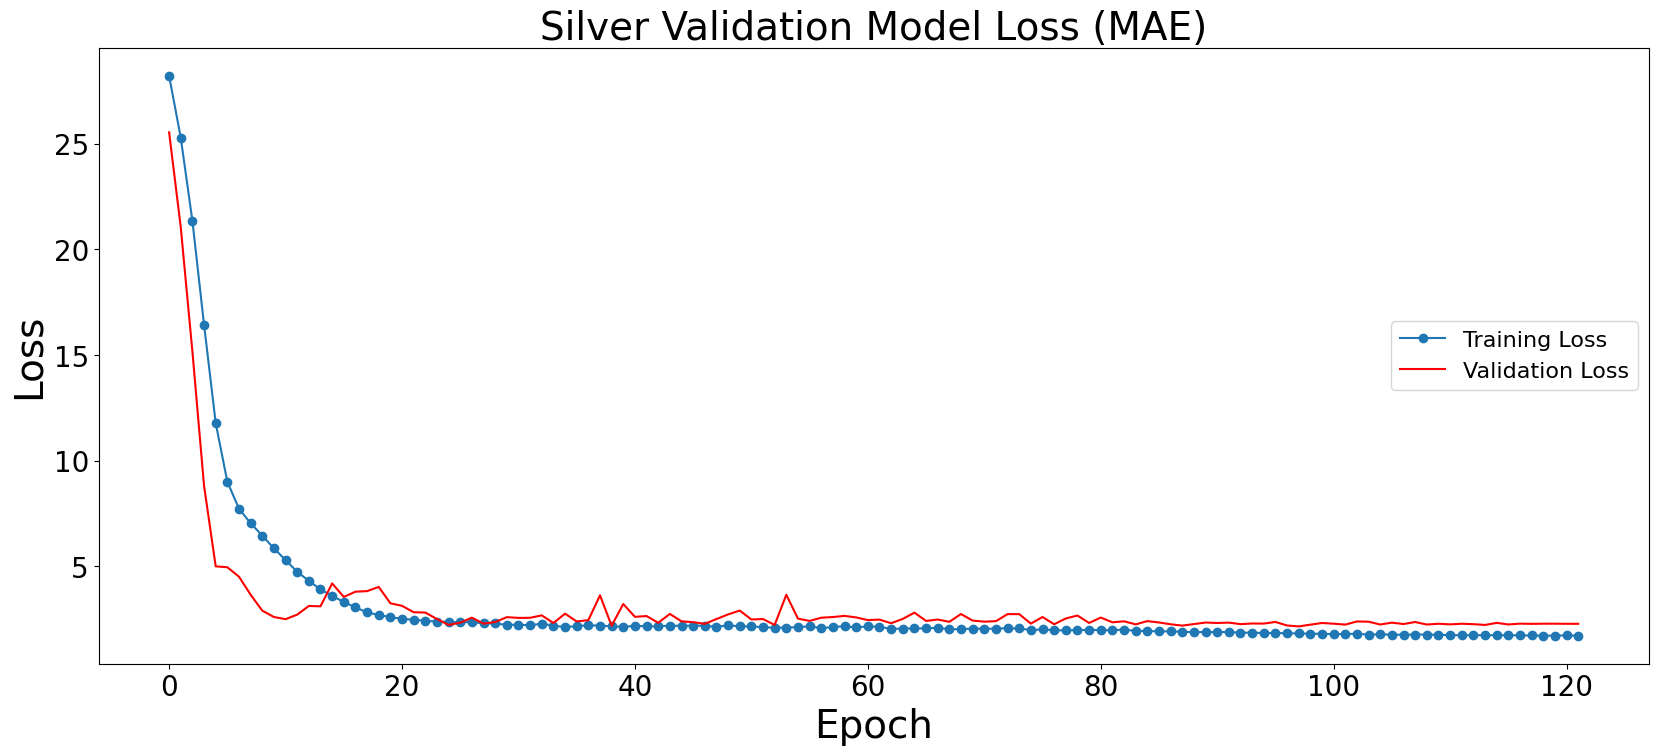

In [40]:
#visualizing MAE, evaluation metric 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(silvermetrics["MAE"], '-o', label="Training Loss")  
ax.plot(silvermetrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Silver Validation Model Loss (MAE)", fontsize=28)

In [41]:
#calculating MAPE for model accuracy
silvermean = silverdf_val['y'].mean()


In [42]:
silverresult =2.279687/silvermean *100
print("The MAPE of the silver model is: ", silverresult)


if silverresult >=26:
    print("Null Hypothesis: The accuracy of this model does not meet 75% accuracy")
else:
    print("Alternate Hypothesis: The accuracy of this model does meet 75% accuracy")

The MAPE of the silver model is:  9.887798303308317
Alternate Hypothesis: The accuracy of this model does meet 75% accuracy


# Platinum Model & Validation

In [43]:
#NeuralProphet expects two columns: 'ds' for dates and 'y' for observed value
platdf.rename(columns = {'date':'ds', 'close' : 'y'}, inplace=True)

In [44]:
#platinum model and visualizations 

#fitting model to a split dataset (90/10 : train/test)
m = NeuralProphet()
platdf_train, platdf_val = m.split_df(platdf, freq='M', valid_p = 0.1)
platmetrics = m.fit(platdf_train, freq='M', validation_df=platdf_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.775% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.709% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - 

Finding best initial lr:   0%|          | 0/242 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [45]:
#evaluation metrics
platmetrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,3433.984131,3528.603271,2.078300,0.0,0,2374.781982,2588.062988,1.068476,0.0
1,3023.494385,3119.067627,1.770250,0.0,1,2118.256348,2332.353516,0.921164,0.0
2,2435.291504,2528.649414,1.330117,0.0,2,1761.417847,1965.339355,0.717244,0.0
3,1630.739258,1706.771362,0.737175,0.0,3,1270.274658,1449.984131,0.444890,0.0
4,798.779419,832.665955,0.195425,0.0,4,699.775391,823.908386,0.167945,0.0
...,...,...,...,...,...,...,...,...,...
120,70.772827,86.146721,0.002092,0.0,120,80.578171,112.015930,0.002854,0.0
121,71.413605,86.985535,0.002133,0.0,121,80.796410,112.277397,0.002859,0.0
122,70.739136,86.227348,0.002096,0.0,122,80.248367,111.990746,0.002848,0.0
123,70.333969,85.859566,0.002078,0.0,123,80.486267,111.912163,0.002851,0.0


In [46]:
#creating predictions 
platfuture = m.make_future_dataframe(platdf, periods=12)
platforecast = m.predict(platfuture)

#view the first 5 entries of forecasted prices
platforecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.775% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


Predicting: 148it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-08-31,None,924.385010,1322.935059,1.644187,-400.194305
1,2023-09-30,None,2395.570801,1322.623779,-39.368629,1112.315918
2,2023-10-31,None,880.185486,1322.302002,-43.774101,-398.342377
3,2023-11-30,None,892.199402,1321.990479,-29.596737,-400.194305
4,2023-12-31,None,2174.117676,1321.668701,-34.243633,886.692871


In [47]:
#view the last 5 entries of forecasted prices
platforecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
7,2024-03-31,None,2234.815918,1320.724121,27.399117,886.692871
8,2024-04-30,None,960.145813,1320.412598,38.075562,-398.342377
9,2024-05-31,None,921.174561,1320.090820,2.236267,-401.152588
10,2024-06-30,None,2209.610596,1319.779297,3.138392,886.692871
11,2024-07-31,None,909.912354,1319.457520,-9.815709,-399.729492


In [48]:
#visualization of prediction 
m.plot(platforecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'a34602ff-c192-4eb2-ba39-d002c9fb1868',
              'x': array([datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 9, 30, 0, 0),
                          datetime.datetime(2023, 10, 31, 0, 0),
                          datetime.datetime(2023, 11, 30, 0, 0),
                          datetime.datetime(2023, 12, 31, 0, 0),
                          datetime.datetime(2024, 1, 31, 0, 0),
                          datetime.datetime(2024, 2, 29, 0, 0),
                          datetime.datetime(2024, 3, 31, 0, 0),
                          datetime.datetime(2024, 4, 30, 0, 0),
                          datetime.datetime(2024, 5, 31, 0, 0),
                          datetime.datetime(2024, 6, 30, 0, 0),
           

In [49]:
#visualized components 
m.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '789d8d2f-a11e-49c9-a494-cf3f7fa72491',
              'x': array([datetime.datetime(2000, 1, 31, 0, 0),
                          datetime.datetime(2000, 2, 29, 0, 0),
                          datetime.datetime(2000, 3, 31, 0, 0), ...,
                          datetime.datetime(2021, 4, 30, 0, 0),
                          datetime.datetime(2021, 5, 31, 0, 0),
                          datetime.datetime(2021, 6, 30, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([ 928.05137787,  928.07568073,  928.10165965, ..., 1331.78988315,
                          1331.46808142, 1331.15666038]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'name': 'Trend Rate Change',
              'type': 'bar',
     

Text(0.5, 1.0, 'Platinum Validation Model Loss (MAE)')

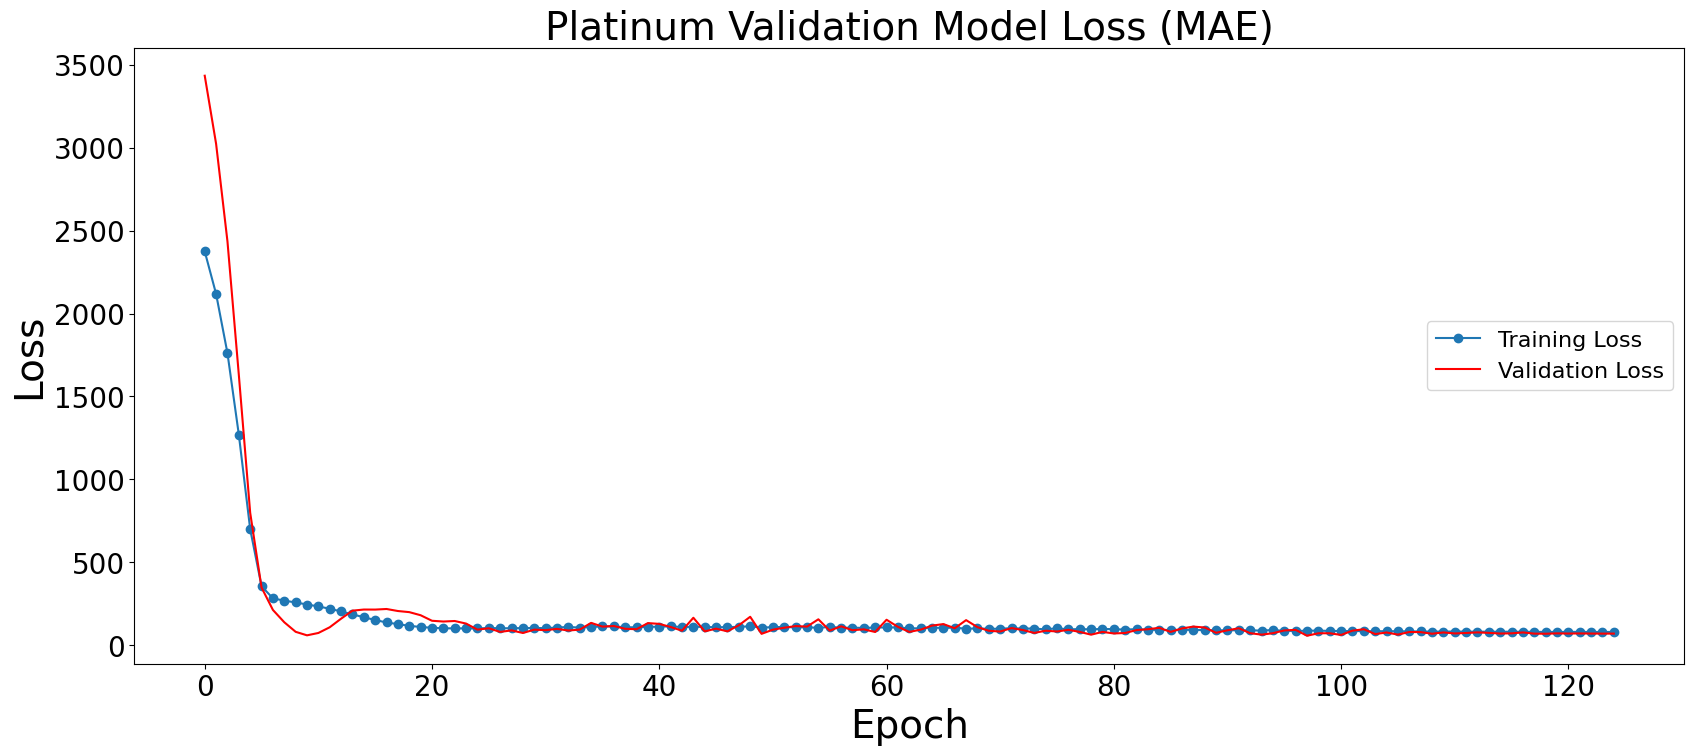

In [50]:
#visualizing MAE, evaluation metric 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(platmetrics["MAE"], '-o', label="Training Loss")  
ax.plot(platmetrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Platinum Validation Model Loss (MAE)", fontsize=28)

In [51]:
#calculating MAPE for model accuracy
platmean = platdf_val['y'].mean()
platresult =70.095779/platmean *100
print("The MAPE of the platinum model is: ", platresult)


if platresult >=26:
    print("Null Hypothesis: The accuracy of this model does not meet 75% accuracy")
else:
    print("Alternate Hypothesis: The accuracy of this model does meet 75% accuracy")

The MAPE of the platinum model is:  7.15312596065906
Alternate Hypothesis: The accuracy of this model does meet 75% accuracy


## Palladium Model & Validation

In [52]:
#NeuralProphet expects two columns: 'ds' for dates and 'y' for observed value
palldf.rename(columns = {'date':'ds', 'close' : 'y'}, inplace=True)

In [53]:
#palladium model and visualizations 

#fitting model to a split dataset (80/20 : train/test)
m = NeuralProphet()
palldf_train, palldf_val = m.split_df(palldf, freq='M', valid_p = 0.2)
pallmetrics = m.fit(palldf_train, freq='M', validation_df=palldf_val)

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.869% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.796% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO - 

Finding best initial lr:   0%|          | 0/241 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

In [54]:
#evaluation metrics
pallmetrics

,MAE_val,RMSE_val,Loss_val,RegLoss_val,epoch,MAE,RMSE,Loss,RegLoss
0,1069.572266,1271.382812,0.826248,0.0,0,788.121582,961.859253,0.387364,0.0
1,1088.620239,1267.905518,0.843728,0.0,1,699.639648,854.949585,0.320178,0.0
2,1100.224365,1238.170166,0.844359,0.0,2,588.718323,719.521729,0.239610,0.0
3,1064.357056,1143.941284,0.778509,0.0,3,453.685028,555.194885,0.150768,0.0
4,952.884338,1001.985596,0.649994,0.0,4,318.901031,393.263855,0.076977,0.0
...,...,...,...,...,...,...,...,...,...
122,465.646790,517.986938,0.270345,0.0,122,79.278099,109.265205,0.006998,0.0
123,465.204651,517.499329,0.270106,0.0,123,79.217506,109.229240,0.006993,0.0
124,465.721954,517.987305,0.270813,0.0,124,79.255486,109.206558,0.006985,0.0
125,465.721283,517.999390,0.270712,0.0,125,79.245491,109.126671,0.006984,0.0


In [55]:
#creating predictions
pallfuture = m.make_future_dataframe(palldf, periods=12)
pallforecast = m.predict(pallfuture)

#view the first 5 entries of forecasted prices
pallforecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency B corresponds to 95.869% of the data.
WARNING - (NP.df_utils._infer_frequency) - Defined frequency M is different than major frequency B
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [91.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M


Predicting: 137it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2023-08-31,None,1364.661011,1289.375854,-14.729120,90.014359
1,2023-09-30,None,1225.493164,1295.688843,-12.962118,-57.233627
2,2023-10-31,None,1376.725098,1302.212646,-14.978318,89.490784
3,2023-11-30,None,1395.132324,1308.525757,-3.407813,90.014359
4,2023-12-31,None,938.541931,1315.049316,18.762632,-395.270020


In [56]:
#view the last 5 entries of forecasted prices
pallforecast.tail()

,ds,y,yhat1,trend,season_yearly,season_weekly
7,2024-03-31,None,953.185608,1334.199219,14.256387,-395.270020
8,2024-04-30,None,1415.898682,1340.512573,-14.104721,89.490784
9,2024-05-31,None,1430.651123,1347.035889,-8.290035,91.905182
10,2024-06-30,None,943.199219,1353.349243,-14.879937,-395.270020
11,2024-07-31,None,1429.798340,1359.872803,-20.097332,90.022865


In [57]:
#visualization of prediction 
m.plot(pallforecast)

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': 'rgba(45, 146, 255, 1.0)', 'width': 2},
              'mode': 'lines',
              'name': 'yhat1',
              'type': 'scatter',
              'uid': 'dcc23a1b-db77-4c30-9ab2-6f3fd297f82e',
              'x': array([datetime.datetime(2023, 8, 31, 0, 0),
                          datetime.datetime(2023, 9, 30, 0, 0),
                          datetime.datetime(2023, 10, 31, 0, 0),
                          datetime.datetime(2023, 11, 30, 0, 0),
                          datetime.datetime(2023, 12, 31, 0, 0),
                          datetime.datetime(2024, 1, 31, 0, 0),
                          datetime.datetime(2024, 2, 29, 0, 0),
                          datetime.datetime(2024, 3, 31, 0, 0),
                          datetime.datetime(2024, 4, 30, 0, 0),
                          datetime.datetime(2024, 5, 31, 0, 0),
                          datetime.datetime(2024, 6, 30, 0, 0),
           

In [58]:
#visualized components 
m.plot_parameters()

FigureWidgetResampler({
    'data': [{'fill': 'none',
              'line': {'color': '#2d92ff', 'width': 2},
              'mode': 'lines',
              'name': 'Trend',
              'type': 'scatter',
              'uid': '2c5d77a9-1f1c-4326-b7d9-f57ba7268726',
              'x': array([datetime.datetime(2000, 1, 31, 0, 0),
                          datetime.datetime(2000, 2, 29, 0, 0),
                          datetime.datetime(2000, 3, 31, 0, 0), ...,
                          datetime.datetime(2018, 12, 31, 0, 0),
                          datetime.datetime(2019, 1, 31, 0, 0),
                          datetime.datetime(2019, 2, 28, 0, 0)], dtype=object),
              'xaxis': 'x',
              'y': array([582.67493726, 582.79621094, 582.92584833, ..., 930.78835923,
                          937.31195799, 943.20424074]),
              'yaxis': 'y'},
             {'marker': {'color': '#2d92ff'},
              'name': 'Trend Rate Change',
              'type': 'bar',
          

Text(0.5, 1.0, 'Palladium Validation Model Loss (MAE)')

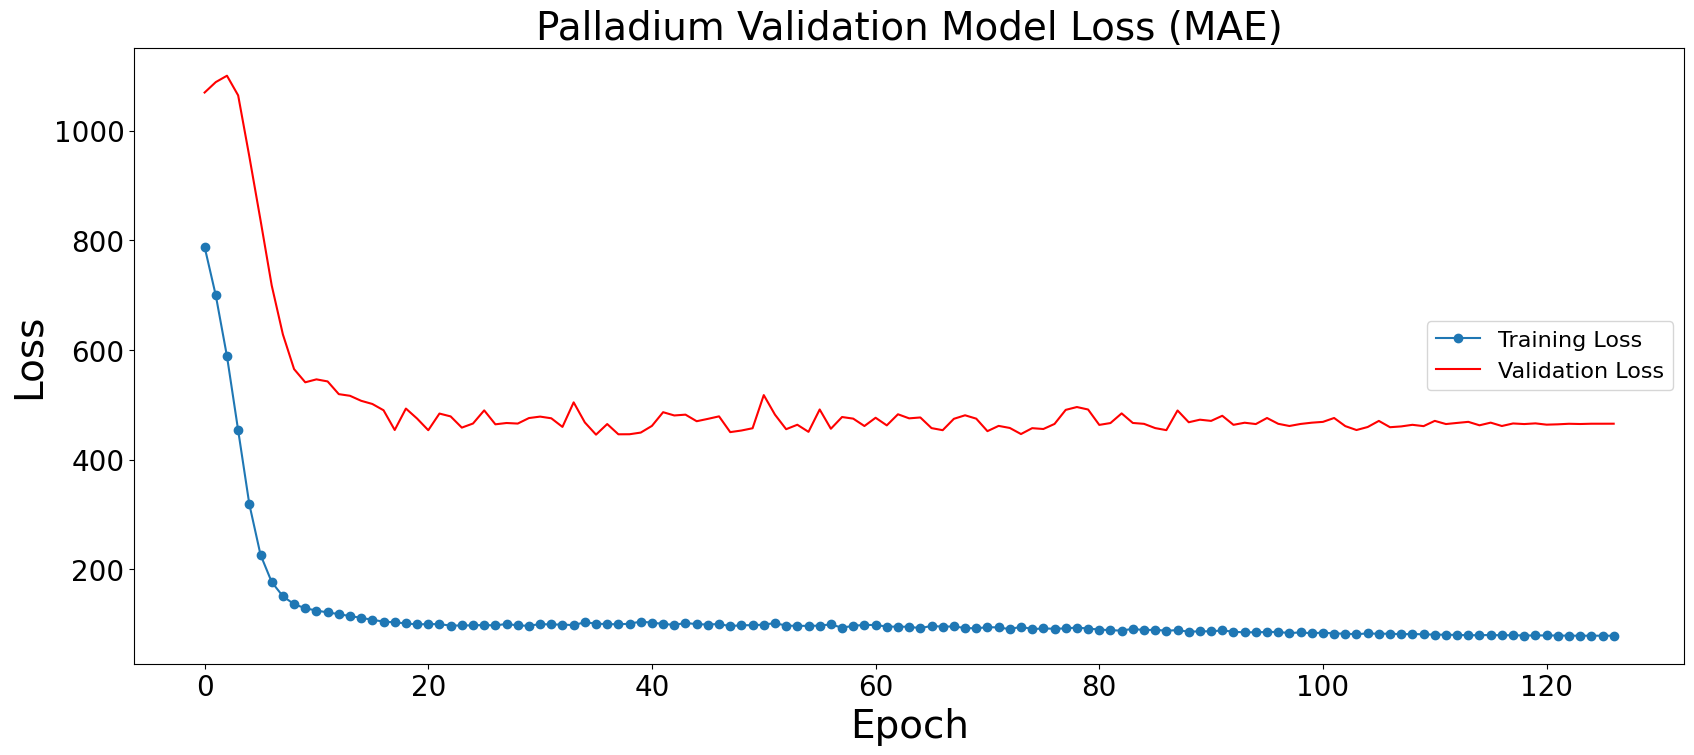

In [59]:
#visualizing MAE, evaluation metric 
fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(pallmetrics["MAE"], '-o', label="Training Loss")  
ax.plot(pallmetrics["MAE_val"], '-r', label="Validation Loss")
ax.legend(loc='center right', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel("Epoch", fontsize=28)
ax.set_ylabel("Loss", fontsize=28)
ax.set_title("Palladium Validation Model Loss (MAE)", fontsize=28)

In [60]:
#calculating MAPE for model accuracy
pallmean = palldf_val['y'].mean()

In [61]:
pallresult =466.048218/pallmean *100
print("The MAPE of the palladium model is: ", pallresult)
if pallresult >= 26:
    print("Null Hypothesis: The accuracy of this model does not meet 75% accuracy")
else:
    print("Alternate Hypothesis: The accuracy of this model does meet 75% accuracy")

The MAPE of the palladium model is:  23.42668152993183
Alternate Hypothesis: The accuracy of this model does meet 75% accuracy
